In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('Datasets/iris_data.csv')

In [3]:
data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [4]:
x = data[['petal_length','petal_width']]

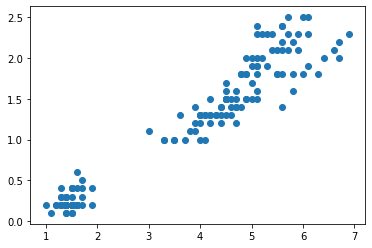

In [9]:
plt.scatter(x.iloc[:,0],x.iloc[:,1]) # or x['petal_length'],x[petal_width]
plt.show()

In [49]:
model = KMeans(n_clusters = 3)
mt = model.fit(x)
ypredicted = model.predict(x)

In [50]:
ypredicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
data['target_predicted'] = ypredicted
centroids = model.cluster_centers_

In [59]:
df1 = data[['petal_length', 'petal_width']][data['target_predicted'] == 0]
df2 = data[['petal_length', 'petal_width']][data['target_predicted'] == 1]
df3 = data[['petal_length', 'petal_width']][data['target_predicted'] == 2]

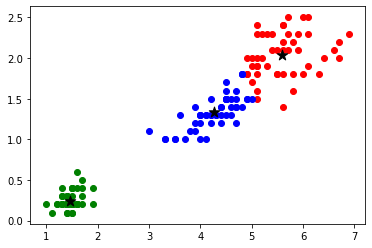

In [63]:
plt.scatter(df1['petal_length'], df1['petal_width'], c = 'red')
plt.scatter(df2['petal_length'], df2['petal_width'], c = 'green')
plt.scatter(df3['petal_length'], df3['petal_width'], c = 'blue')
plt.scatter(centroids[:,0],centroids[:,1], c='black', s = 121, marker = '*')
plt.show()

In [75]:
k = list(range(1,16))
SSE = []

In [76]:
for i in k:
    model = KMeans(n_clusters = i)
    mt = model.fit(x)
    SSE.append(model.inertia_)

In [77]:
SSE

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.025145110250374,
 9.261846477194304,
 7.615402244955953,
 6.456494541406307,
 5.550520182431947,
 5.1623095515595505,
 4.74285561497326,
 4.268640720390719,
 4.000219298245613,
 3.65450808913309]

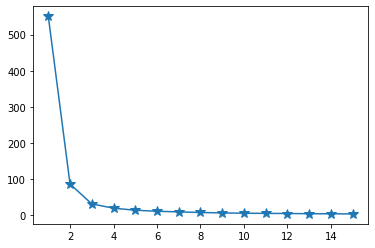

In [81]:
plt.plot(k,SSE, marker = '*', ms = 10)
plt.show()

in the above graph we can we elbow shape at 2 and 3 therefore we can keep the number of clusters to either 2 or 3, as after which we have flat line

In [88]:
accuracy_score(data['target'], ypredicted) * 100

96.0

In [87]:
data['target'] = data['target'].map({0:1, 1:2, 2:0})